In [7]:
%matplotlib inline
import sympy as smp
import numpy as np
from scipy.optimize import least_squares

# Functions to make easier
Declaring a function to convert geoghaphic coordinates in polar coordinates
Also vector of the sites created. This will be used to find the plane that contains two sites

In [75]:
def convertCoordinates(latitude, longitude) :
    phi = 90 - latitude
    if longitude < 0:
        longitude = 360 + longitude
        
    myphi = (phi * np.pi) / 180.
    mytheta = (longitude * np.pi) / 180.
    return mytheta, myphi
def evalCoordinates(latitude, longitude):
    theta, phi = convertCoordinates(latitude, longitude)
    return np.cos(theta)*np.sin(phi), np.sin(theta)*smp.sin(phi), np.cos(phi)

### Create x, y and z in spherical coordinates

In [76]:
def createMatrix(lat_long):
    latitude = lat_long[0]
    longitude = lat_long[1]
    theta, phi = convertCoordinates(latitude, longitude)
    points = np.array([np.cos(theta)*np.sin(phi), np.sin(theta)*np.sin(phi), np.cos(phi)])
    return points

### getLat will return me latitude for a given longitude, constrained by the interception of a sphere with the normal plane
The check if a point belongs to a point, I use:\
$\hat{n} \cdot (P_0 - \left<x,y,z\right>) = 0$

Where $P_0$ is the origin of the sphare and x, y and z are constrained by the radious of the sphere\
(Note: if $P_0$ != $(0,0,0)$ the result still holds, but in the video the plane must cross the center of the Earth)

The constrain in x, y and z is easy as I am using spherical coordinates. Therefore, the equation becomes:\
$n_x \cos(\theta)\sin(\phi) + n_y \sin(\theta)sin\phi) + n_z\cos(\phi) = 0 $\
To be solved for $\phi$ (latitude)

In [220]:
def funcLine(x, *par):
    return [(np.sin(x[0])*par[0] + np.sin(x[0])*par[1] + np.cos(x[0])*par[2]) - par[3]] 


def getLat(longitude, normalplane, guess = 1.):
    mytheta, _ = convertCoordinates(0, longitude)
    #print(f'{np.degrees(mytheta)}')
    longx = np.cos(mytheta)
    longy = np.sin(mytheta)
    coord_tp = np.array([longx,longy,1,1])
    
    par = normalplane*coord_tp
    #print(par)
    par = tuple( x for x in par)
    
    root = least_squares(funcLine,[guess],args = par, bounds=(0,np.pi))
    #print(f'root = {root.x*180/np.pi}')
    #converting back to latitude
    theta = root.x[0]*180/np.pi
    latitude = 90 - theta
    return latitude

Testing `getLat`\
You can draw this lines if needed. Using a normal vector as $(0,0,1)$ is easy to check.

Using $(1,0,1)$ is a bit more challenging, but quite a nice test\
for $\text{longitude} = 0$, $x, y, z = (0.707, 0, -0.707)$\
for $\text{longitude} = 90$, $x, y, z = (0,1,0)$\
for $\text{longitude} = 180$, $x, y, z = (-0.707, 0, +0.707)$

In [221]:
par = np.array([1,0,1])
lon_test = 0
par = par/np.linalg.norm(par);
par = np.append(par,0)
lat = getLat(lon_test,par)
x, y, z = evalCoordinates(lat, lon_test)
print(f'{x} {y} {z}')
#funcLine([2],*testk)
#np.cos(np.radians(lat/360**3))



0.7071067829894483 0 -0.7071067793836467


# Testing if logic works

In [222]:
site1 = createMatrix([-45, 0])
site2 = createMatrix([0,90])
normalplane = np.cross(site1,site2)
if (normalplane[2] < 0 ):
    normalplane *= -1

normalplane = np.append(normalplane,0)
theta = getLat(0,normalplane)
#print(np.degrees(theta.x[0]))


#np.cross(site1, site2)

In [223]:
sites_name = ["khufus",
              "cusco",
              "dogon",
              "richat structure",
               "Nazca",
               "Siwa",
               "Persepolis",
               "Mohenjo-daro",
               "Tassili n'Ajjer",
               "Khajuraho",
               "Angkor Wat",
               "Sukhothao"];
khufus = [29.979364870160097, 31.134276335617763]
cusco = [-13.509744575389755, -71.98127257903684]
dogon = [14.51978905371621, -3.3367679384686415] 
richat = [22.130445452634085, -11.393038584831498]
nazca = [-14.737860753819678, -75.12968373669136]
siwa = [29.342956345199564, 25.484203846977397]
persepolis = [29.935717515280537, 52.89158439335407]
mohenjo = [27.324465048035997, 68.13578838967938]
tassili = [25.814098244920874, 8.1338085807607]
khajuraho = [24.83240295582695, 79.92026864072902]
angkor = [13.412709291959462, 103.86293017924665]
sukhothai = [17.01301606188515, 99.80904408904023]

sites_location = [khufus, cusco, dogon, richat, nazca, siwa, persepolis, mohenjo, tassili, khajuraho, angkor, sukhothai]

In [224]:
site1 = createMatrix(khufus)
site2 = createMatrix(cusco)

normalplane = np.cross(site1,site2)
normalplane = np.append(normalplane,0)
if (normalplane[2] < 0 ):
    normalplane *= -1

linelon = [i for i in np.arange(0, 360+2.5, 2.5)]
latitude = getLat(cusco[1], normalplane)
print(latitude) # should return the same latitude as site[0]
x, y, z = evalCoordinates(latitude,cusco[1])
#print(f'{x, y, z}')

#np.dot(normalplane,[x,y,z,1]) # checks if gives zero 

linelat = np.zeros(len(linelon))
for i, lon in enumerate(linelon):
    linelat[i] = getLat(lon, normalplane)

-13.509744525095883


In [237]:
ecliptic1 = [23.5]
ecliptic2 = [-23.5]
lineeclp1 = np.full(len(linelon), ecliptic1[0])
lineeclp2 = np.full(len(linelon), ecliptic2[0])
    


In [233]:
import plotly.graph_objects as go

In [238]:
scl = ['rgb(255,0,0)', 'rgb(0,0,255)']
n_colors = len(scl)
fig = go.Figure()

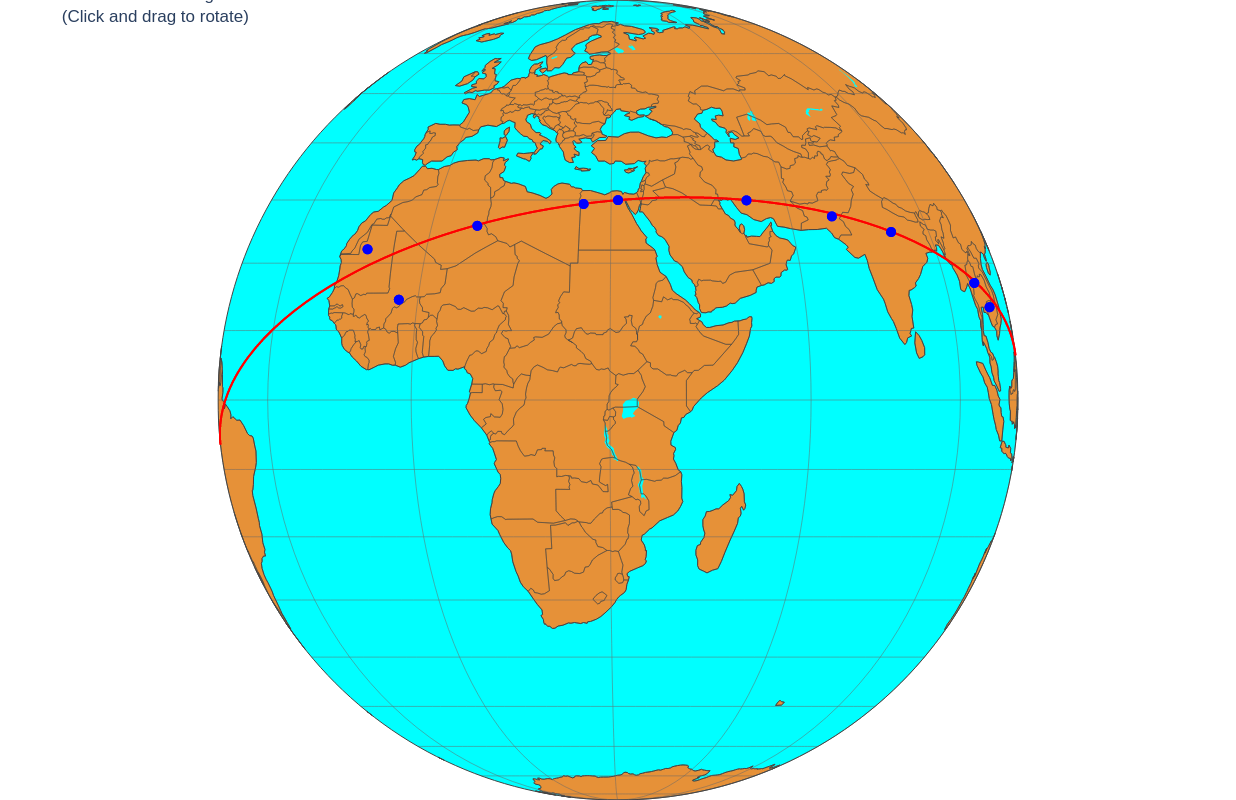

In [244]:
fig.add_trace(go.Scattergeo( lon = linelon, lat = linelat, mode = 'lines', line = dict(width = 2, color = scl[0] )))
#fig.add_trace(go.Scattergeo( lon = linelon, lat = lineeclp1, mode = 'lines', line = dict(width = 2, color = scl[1] )))
#fig.add_trace(go.Scattergeo( lon = linelon, lat = lineeclp2, mode = 'lines', line = dict(width = 2, color = scl[1] )))
for locname, loc in zip(sites_name, sites_location):
    fig.add_trace(go.Scattergeo(
        lon = [loc[1]],
        lat = [loc[0]],
        text = locname,
        mode = 'markers',
        marker_color = scl[1],
        marker=dict(size=10)))
fig.update_layout(
    title_text = 'Contour lines over globe<br>(Click and drag to rotate)',
    showlegend = False,
    autosize = False,
    width = 800,
    height = 800,
    geo = dict(
        showland = True,
        showcountries = True,
        showocean = True,
        countrywidth = 0.5,
        landcolor = 'rgb(230, 145, 56)',
        lakecolor = 'rgb(0, 255, 255)',
        oceancolor = 'rgb(0, 255, 255)',
        projection = dict(
            type = 'orthographic',
            rotation = dict(
                #lon = khufus[1],
                #lat = khufus[0],
                lon = khufus[1],
                lat = 0,
                roll = 0
            )
        ),
        lonaxis = dict(
            showgrid = True,
            gridcolor = 'rgb(102, 102, 102)',
            gridwidth = 0.5
        ),
        lataxis = dict(
            showgrid = True,
            gridcolor = 'rgb(102, 102, 102)',
            gridwidth = 0.5
        )
    )
)

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
)
fig.show()
